# Reading Data

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df = pd.read_csv("train.csv")
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [8]:
df.dtypes

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

In [9]:
df.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


# Filling Missing Value

In [10]:
df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [11]:
train_df = df

train_df['keyword'].fillna('No_Keyword', inplace= True)
train_df['location'].fillna('No_Location', inplace= True)

train_df.head(10)

,id,keyword,location,text,target
0,1,No_Keyword,No_Location,Our Deeds are the Reason of this #earthquake M...,1
1,4,No_Keyword,No_Location,Forest fire near La Ronge Sask. Canada,1
2,5,No_Keyword,No_Location,All residents asked to 'shelter in place' are ...,1
3,6,No_Keyword,No_Location,"13,000 people receive #wildfires evacuation or...",1
4,7,No_Keyword,No_Location,Just got sent this photo from Ruby #Alaska as ...,1
5,8,No_Keyword,No_Location,#RockyFire Update => California Hwy. 20 closed...,1
6,10,No_Keyword,No_Location,#flood #disaster Heavy rain causes flash flood...,1
7,13,No_Keyword,No_Location,I'm on top of the hill and I can see a fire in...,1
8,14,No_Keyword,No_Location,There's an emergency evacuation happening now ...,1
9,15,No_Keyword,No_Location,I'm afraid that the tornado is coming to our a...,1


# Cleaning Data

In [12]:
import nltk
import regex as rx
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
def preprocess_text(text):
    
    text = rx.sub(r'http\S+', '', text)  #remove URLs
    
    text = rx.sub(r'<.*?>', '', text)  #remove HTML tags
    
    text = rx.sub(r'[\U00010000-\U0010ffff]', '', text)  #remove Emojis
    
    text = rx.sub(r'[^\w\s]', '', text)  #remove Punctuation
    
    tokens = word_tokenize(text)
    
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.lower() not in stop_words]
    
    processed_text = ' '.join(tokens)
    
    return processed_text

In [14]:
train_df['text'] = train_df.loc[:, 'text'].apply(preprocess_text)

train_df['keyword'] = train_df.loc[:, 'keyword'].apply(preprocess_text)

train_df['location'] = train_df.loc[:, 'location'].apply(preprocess_text)


In [15]:
train_df.head(10)

,id,keyword,location,text,target
0,1,No_Keyword,No_Location,Deeds Reason earthquake May ALLAH Forgive us,1
1,4,No_Keyword,No_Location,Forest fire near La Ronge Sask Canada,1
2,5,No_Keyword,No_Location,residents asked shelter place notified officer...,1
3,6,No_Keyword,No_Location,13000 people receive wildfires evacuation orde...,1
4,7,No_Keyword,No_Location,got sent photo Ruby Alaska smoke wildfires pou...,1
5,8,No_Keyword,No_Location,RockyFire Update California Hwy 20 closed dire...,1
6,10,No_Keyword,No_Location,flood disaster Heavy rain causes flash floodin...,1
7,13,No_Keyword,No_Location,Im top hill see fire woods,1
8,14,No_Keyword,No_Location,Theres emergency evacuation happening building...,1
9,15,No_Keyword,No_Location,Im afraid tornado coming area,1


# Representation and Visualization of Data

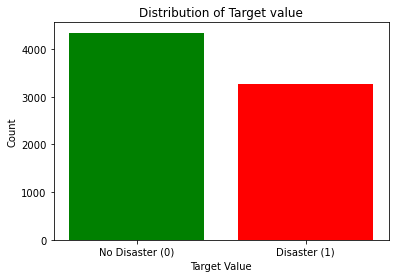

In [12]:
target_count = train_df['target'].value_counts()

plt.bar(target_count.index, target_count.values, color=['green', 'red'])
plt.xlabel('Target Value')
plt.ylabel('Count')
plt.title('Distribution of Target value')
plt.xticks(target_count.index, ['No Disaster (0)', 'Disaster (1)'])
plt.show()

In [13]:
location_count = train_df['location'].value_counts()

positive_df = train_df[train_df['target'] == 1]

negative_df = train_df[train_df['target'] == 0]

top_positive_location = positive_df[(positive_df['location'] != 'No_Location')]['location'].value_counts().head(10)

top_negative_location = negative_df[(negative_df['location'] != 'No_Location')]['location'].value_counts().head(10)

<ipython-input-14-df033e805f0b>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[0].set_xticklabels(top_positive_location.index, rotation=60)
<ipython-input-14-df033e805f0b>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[1].set_xticklabels(top_negative_location.index, rotation=60)


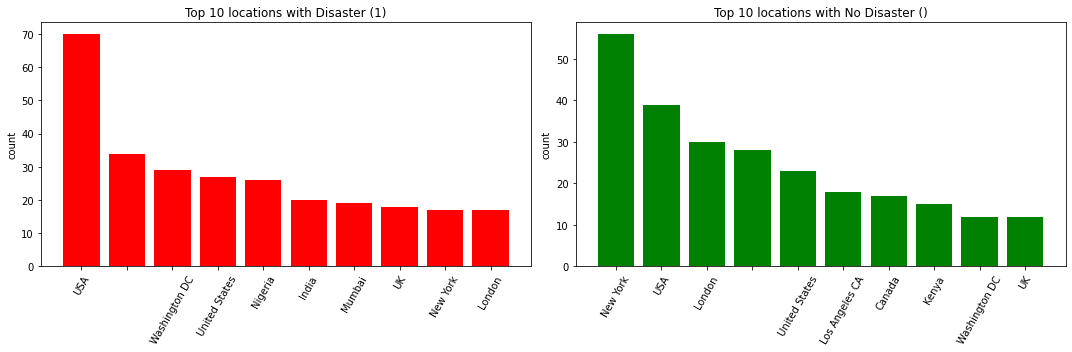

In [14]:
fig, axis = plt.subplots(1, 2, figsize=(15,5))

axis[0].bar(top_positive_location.index, top_positive_location.values, color=['red'])
axis[0].set_title('Top 10 locations with Disaster (1)')
axis[0].set_ylabel('count')
axis[0].set_xticklabels(top_positive_location.index, rotation=60)

axis[1].bar(top_negative_location.index, top_negative_location.values, color=['green'])
axis[1].set_title('Top 10 locations with No Disaster ()')
axis[1].set_ylabel('count')
axis[1].set_xticklabels(top_negative_location.index, rotation=60)

plt.tight_layout()
plt.show()

In [15]:
disaster_keywords = ' '.join(positive_df[(positive_df['keyword'] != 'No_Keyword')]['keyword'].astype(str))

no_disaster_keywords = ' '.join(negative_df[(negative_df['keyword'] != 'No_Keyword')]['keyword'].astype(str))

In [16]:
%pip install --upgrade Pillow
%pip install --upgrade numpy

Note: you may need to restart the kernel to use updated packages.
  Using cached numpy-1.24.4-cp38-cp38-win_amd64.whl (14.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\DELL\\anaconda3\\Lib\\site-packages\\~~mpy\\.libs\\libopenblas64__v0.3.21-gcc_10_3_0.dll'
Consider using the `--user` option or check the permissions.



In [17]:
!pip install wordcloud

from wordcloud import WordCloud

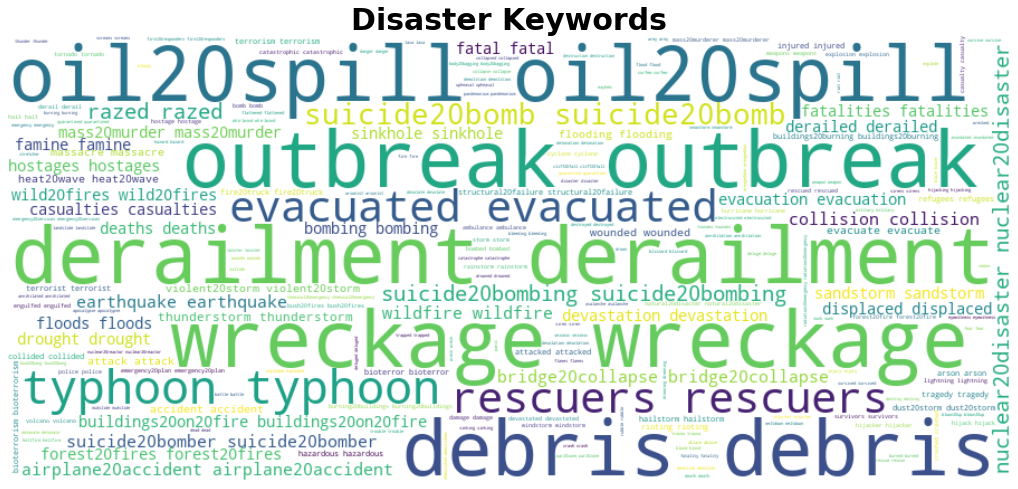

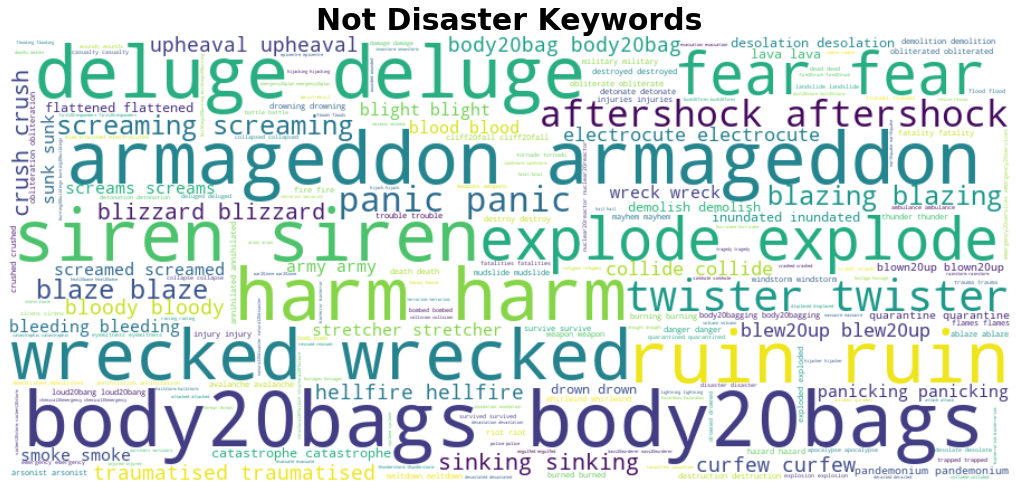

In [18]:
def generate_word_cloud(data,title):

    wordcloud = WordCloud(width=900, height=400, max_words=200, background_color='white').generate(data)

    plt.figure(figsize=(18, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(label=title, fontsize=30, fontweight='bold')
    plt.axis('off')
    plt.show()

generate_word_cloud(disaster_keywords,"Disaster Keywords")
print('\n')
generate_word_cloud(no_disaster_keywords,"Not Disaster Keywords")

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

positive_data = positive_df['text']
negative_data = negative_df['text']

In [20]:
def get_top_words(text, n=10):
    cV = CountVectorizer()
    X = cV.fit_transform(text)
    words = cV.get_feature_names()
    word_count = X.sum(axis=0).A1
    word_freq = dict(zip(words, word_count))
    sorted_word_freq = sorted(word_freq.items(), key=lambda x:x[1], reverse=True)
    return dict(sorted_word_freq[:n])

In [21]:
top_positive_words = get_top_words(positive_data)
top_negative_words = get_top_words(negative_data)

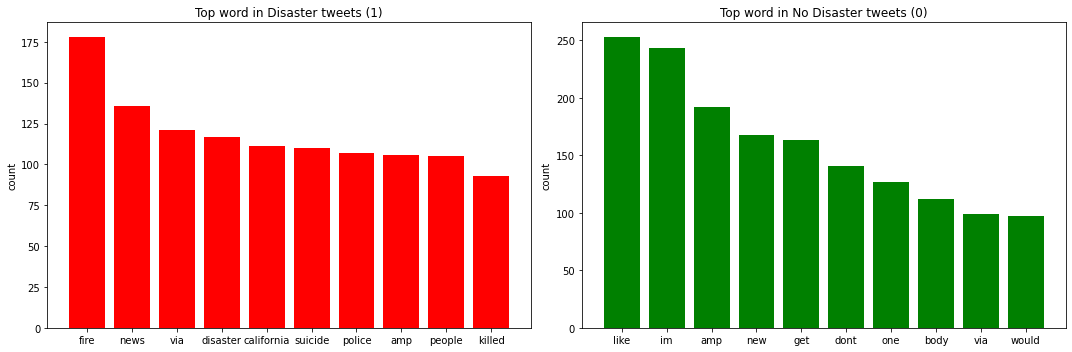

In [22]:
fig, axis = plt.subplots(1, 2, figsize=(15,5))

axis[0].bar(top_positive_words.keys(), top_positive_words.values(), color='red')
axis[0].set_title('Top word in Disaster tweets (1)')
axis[0].set_ylabel('count')

axis[1].bar(top_negative_words.keys(), top_negative_words.values(), color='green')
axis[1].set_title('Top word in No Disaster tweets (0)')
axis[1].set_ylabel('count')

plt.tight_layout()
plt.show()

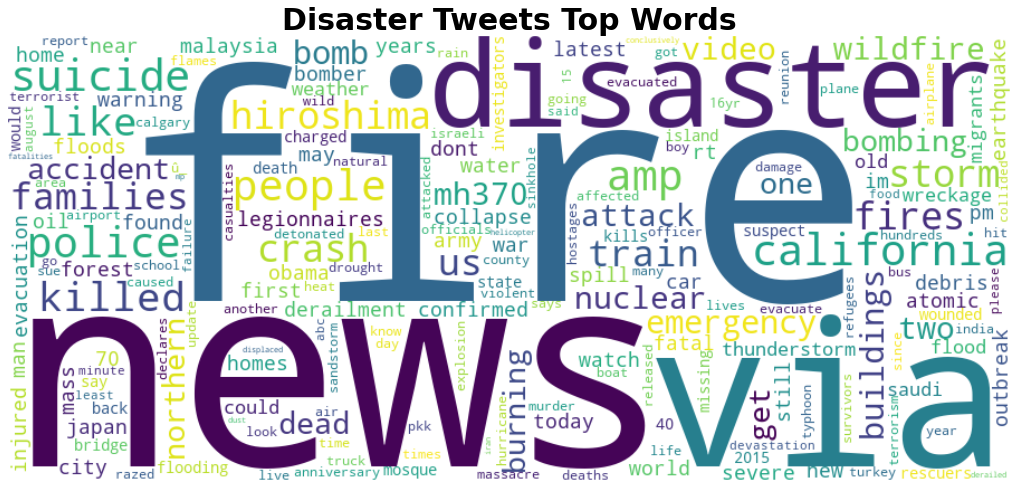

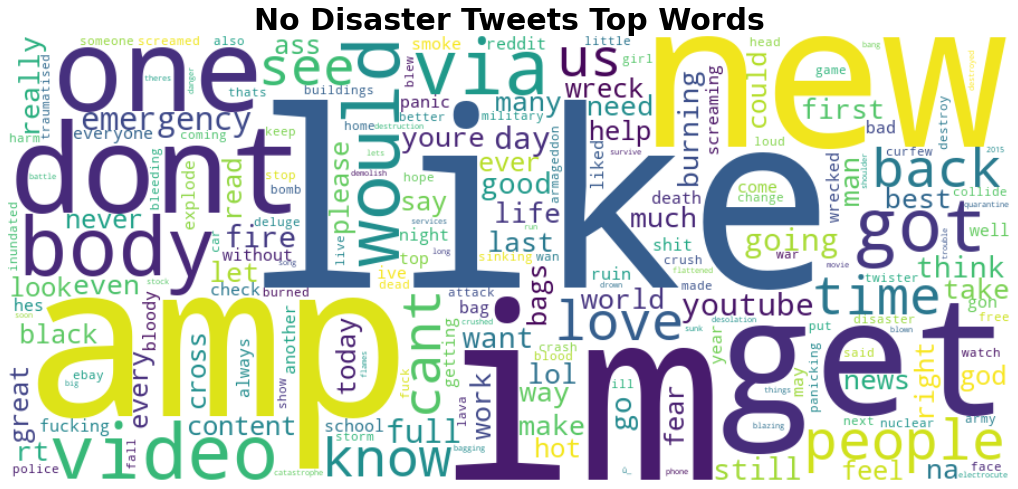

In [23]:
def generate_word_cloud_text(text, title):
    
    cV = CountVectorizer()
    X = cV.fit_transform(text)
    words = cV.get_feature_names()
    word_count = X.sum(axis=0).A1
    word_freq = dict(zip(words, word_count))
    
    word_cloud = WordCloud(width=900, height=400, max_words=200, background_color='white').generate_from_frequencies(word_freq)
    
    plt.figure(figsize=(18, 10))
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.title(label=title, fontsize=30, fontweight='bold')
    plt.axis('off')
    plt.show()
    
generate_word_cloud_text((positive_df['text']), 'Disaster Tweets Top Words')
print('\n')
generate_word_cloud_text((negative_df['text']), 'No Disaster Tweets Top Words')
    

# Train Test Split

In [2]:
!pip install tensorflow
# !conda install -c conda-forge h5py

  Using cached numpy-1.24.3-cp38-cp38-win_amd64.whl (14.9 MB)


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\DELL\\anaconda3\\Lib\\site-packages\\~=mpy\\.libs\\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.0
    Uninstalling numpy-1.21.0:
      Successfully uninstalled numpy-1.21.0


In [5]:
pip install numpy==1.22

  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
Note: you may need to restart the kernel to use updated packages.


In [27]:
from sklearn.model_selection import train_test_split as tts
from tensorflow import keras
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import LSTM, Dense, Embedding
from sklearn.metrics import accuracy_score, classification_report

In [33]:
X = train_df['text']
y = train_df['target']

In [41]:
X_train, X_test, y_train, y_test = tts(X, y, train_size=0.8, random_state=1)

In [42]:
max_text_length = train_df['text'].map(lambda x: len(x)).max()
max_text_length

138

In [44]:
max_words = 5000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_len = 150
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=138, input_length=max_len))
model.add(LSTM(256, dropout=0.3,recurrent_dropout=0.3, activation="tanh", recurrent_activation="sigmoid"))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_pad, y_train, epochs=5, batch_size=32, validation_data=(X_test_pad, y_test))

y_pred_proba = model.predict(X_test_pad)
y_pred = (y_pred_proba > 0.5).astype(int)

Epoch 1/5
191/191 [==============================] - 142s 731ms/step - loss: 0.5327 - accuracy: 0.7365 - val_loss: 0.4400 - val_accuracy: 0.7997
Epoch 2/5
191/191 [==============================] - 140s 732ms/step - loss: 0.3464 - accuracy: 0.8573 - val_loss: 0.4636 - val_accuracy: 0.7991
Epoch 3/5
191/191 [==============================] - 140s 733ms/step - loss: 0.2650 - accuracy: 0.8938 - val_loss: 0.5073 - val_accuracy: 0.7827
Epoch 4/5
191/191 [==============================] - 141s 738ms/step - loss: 0.2055 - accuracy: 0.9167 - val_loss: 0.6425 - val_accuracy: 0.7663
Epoch 5/5
48/48 [==============================] - 5s 104ms/step


In [45]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.78

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       882
           1       0.77      0.67      0.72       641

    accuracy                           0.78      1523
   macro avg       0.78      0.76      0.77      1523
weighted avg       0.78      0.78      0.77      1523



In [46]:
test_df = pd.read_csv('test.csv')
test_df

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [47]:
test_data = test_df['text']

X_test_data = tokenizer.texts_to_sequences(test_data)

X_test_pad_data = pad_sequences(X_test_data, maxlen=max_len)

y_pred_data = model.predict(X_test_pad_data)

102/102 [==============================] - 12s 121ms/step


In [65]:
test_pre = (y_pred_data > 0.5).astype(int)
test_pre = test_pre.ravel()

In [48]:
sample = pd.read_csv('sample_submission.csv')
sample

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0
...,...,...
3258,10861,0
3259,10865,0
3260,10868,0
3261,10874,0


In [66]:
# labels = test_df['id']

# submission_df = pd.Series(test_pre, index=labels)

submission_df = pd.DataFrame({'id': test_df['id'], 'target': test_pre})
submission_df.to_csv('submission.csv', index=False)

In [68]:
submission_df

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,1
